In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
plt.style.use('science')

# Symbolic calculations

In [56]:
# R, beta, D, MdotO, MdotWR, v_O, v_WR = smp.symbols("R_O, beta, D, Mdot_O, Mdot_WR, v_O, v_WR")
# dO, dWR, r = smp.symbols("d_O, d_WR, r")

In [57]:
# v_rO = v_O*(1-R/dO)**beta
# v_rO

v_O*(-R_O/d_O + 1)**beta

In [58]:
# mom_balance = ((MdotO * v_rO)/(MdotWR * v_WR))**smp.Rational(1,2)
# mom_balance


sqrt(Mdot_O*v_O*(-R_O/d_O + 1)**beta/(Mdot_WR*v_WR))

In [59]:
# equation = -mom_balance + dO/dWR
# equation.simplify()

d_O/d_WR - sqrt(Mdot_O*v_O*(-R_O/d_O + 1)**beta/(Mdot_WR*v_WR))

In [60]:
# equation = equation.subs(dWR, D-dO)
# equation

d_O/(D - d_O) - sqrt(Mdot_O*v_O*(-R_O/d_O + 1)**beta/(Mdot_WR*v_WR))

In [61]:
# eq  = smp.Eq(equation, 0)
# eq.simplify()

Eq((d_O + sqrt(Mdot_O*v_O*((-R_O + d_O)/d_O)**beta/(Mdot_WR*v_WR))*(-D + d_O))/(D - d_O), 0)

In [62]:
# trans_eq = smp.lambdify((dO, R, beta, D, MdotO, MdotWR, v_O, v_WR), eq.lhs)
# trans_eq

<function _lambdifygenerated(d_O, R_O, beta, D, Mdot_O, Mdot_WR, v_O, v_WR)>

# Plotting

In [69]:
# D = 2.042e13
# vinf_O = 3100
# vinf_WR = 2860
# Mdot_wr = 1.7e-5
# Mdot_O = 3.7e-7
# R = 1.74e12

# D_array = np.linspace(D, 10*D, 10)
# d = np.linspace(R+1, 5*R, 10000)

# output_array = np.ndarray((len(D_array), len(d)))

# for i in range(len(D_array)):
#     output = trans_eq(d, R, 1, D_array[i], Mdot_O, Mdot_wr, vinf_O, vinf_WR)
#     output_array[i] = output


# output_array.shape

# args = np.where(np.diff(np.sign(output_array)))
# args

# # fig, ax = plt.subplots(figsize=(5,5))
# # ax.plot(D_array, d[args]/R - 1)
# # ax.set_title("Location of shock surface vs distance between stars")
# # ax.set_xlabel("Distance between stars $(cm)$")
# # ax.grid()
# # ax.set_ylabel("Height above O star surface $(R_{O})$")

(array([1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 297, 3733,  102, 7889,   53,   33,   22,   16,   12,    9,    7]))

In [70]:
def transendental_wind(d1, R, beta, D, Mdot_1, Mdot_2, v1, v2):
    return (d1 * (1-R/d1)**(2/beta))/(D-d1) - ((Mdot_1*v1)/(Mdot_2*v2))**1/2
    
def chi(v, d, Mdot):
    v_8 = v/1000
    d = d/1e12
    Mdot = Mdot/1e-7
    return (v_8**4 * d / Mdot)

def velocity(d, v_inf, R):
    return v_inf * (1 - R/d)

Text(0, 0.5, '$\\chi(D)$')

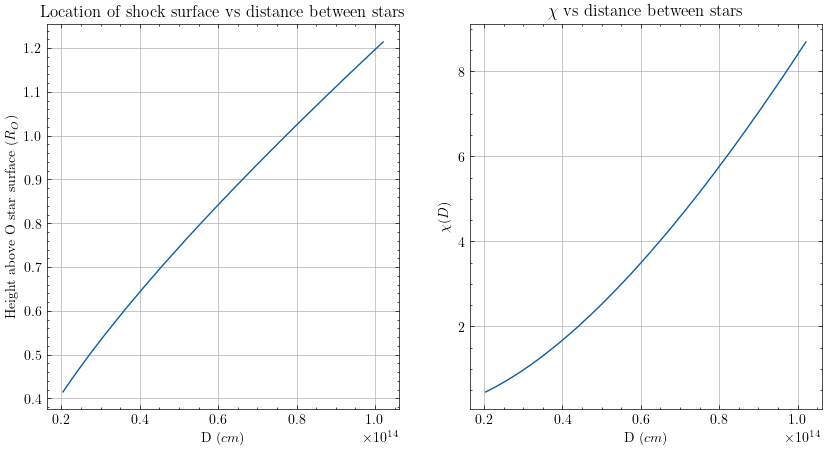

In [97]:
D = 2.042e13
vinf_O = 3100
vinf_WR = 2860
Mdot_wr = 1.7e-5
Mdot_O = 3.7e-7
R = 1.74e12



D_array = np.linspace(D, 5*D, 100)
d = np.linspace(R+1, 5*R, 10000)

output_array = np.ndarray((len(D_array), len(d)))

for i in range(len(D_array)):
    output = transendental_wind(d, R, 1, D_array[i], Mdot_O, Mdot_wr, vinf_O, vinf_WR)
    output_array[i] = output

args = np.where(np.diff(np.sign(output_array)))[1]
args

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(D_array, d[args]/R - 1)
ax[0].set_title("Location of shock surface vs distance between stars")
ax[0].set_xlabel("D $(cm)$")
ax[0].grid()
ax[0].set_ylabel("Height above O star surface $(R_{O})$")

vels = velocity(d[args], vinf_O, R)
chis = chi(vels, d[args], Mdot_O)

ax[1].plot(D_array, chis)
ax[1].grid()
ax[1].set_title("$\chi$ vs distance between stars")
ax[1].set_xlabel("D $(cm)$")
ax[1].set_ylabel("$\chi(D)$")





[0.45415036 0.49197444 0.53166885 0.57168256 0.61347171 0.65705453
 0.70066841 0.7459704  0.79297359 0.84169011 0.89008026 0.94006889
 0.99166439 1.04487445 1.09738899 1.15139838 1.20690771 1.26392149
 1.32244375 1.38247806 1.44131986 1.50155018 1.56317096 1.62618378
 1.69058986 1.75639011 1.82050054 1.88902717 1.95574031 2.02372429
 2.09630813 2.16689258 2.2352954  2.30835579 2.3826825  2.45464577
 2.53144031 2.60575068 2.68500597 2.76165608 2.83944452 2.91836914
 2.99842767 3.07961772 3.16193681 3.24118334 3.32569646 3.41133064
 3.49371885 3.58153069 3.66598221 3.75143484 3.84246347 3.92996227
 4.01845354 4.10793431 4.19840158 4.28985228 4.38228331 4.47569149
 4.57007362 4.66038372 4.7566531  4.85388672 4.94688916 5.04599078
 5.14075675 5.2417133  5.33823032 5.44102851 5.53928385 5.63838021
 5.74389094 5.84470639 5.94635341 6.04882887 6.15212962 6.2562525
 6.36119433 6.46695192 6.57352208 6.68090159 6.78908722 6.89807574
 7.00174365 7.11228406 7.2236178  7.33574159 7.44235878 7.55600

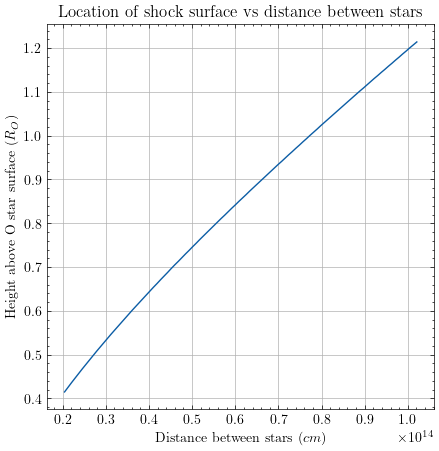

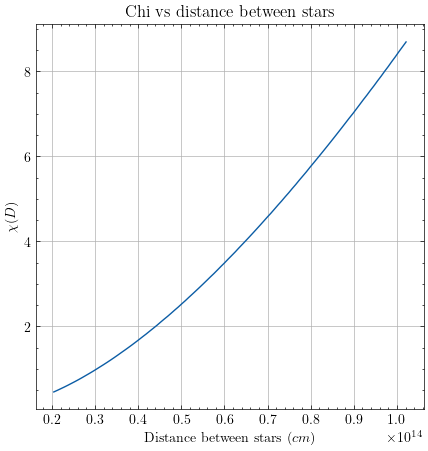

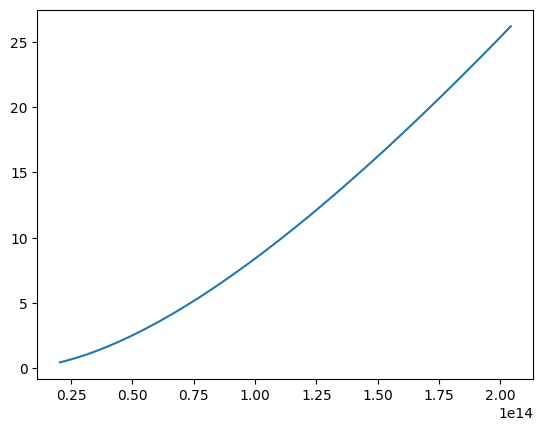

In [164]:
365 * 24 * 60 * 60

Unit("kAU")